In [70]:
# Open the file in read mode ('r')
with open("radius4_catalogue.txt", "r") as file:
    data = file.read()  # Reads the entire content of the file
print(data)


x_coord	y_coord	Total_counts	Aperture_flux	Net_flux	Flux_Error	Magnitude	Mag_Error
1437.00	4059.00	2767127.00	1794340.00	304759.91	95285.45	11.59	0.02
1437.00	4095.00	2740541.00	1790565.00	335914.25	104741.98	11.48	0.02
1437.00	3943.00	2845706.00	1811007.00	226624.16	69258.89	11.91	0.02
1438.00	3215.00	3086163.00	1868059.00	2837.25	606.62	16.67	0.02
1438.00	3830.00	2724184.00	1771968.00	313887.25	97297.12	11.56	0.02
1438.00	3684.00	2882130.00	1826868.00	210998.06	58187.65	11.99	0.02
1400.00	125.00	1291013.00	873689.00	234661.62	53787.04	11.87	0.02
1357.00	127.00	794105.00	561167.00	204480.69	46612.77	12.02	0.02
1338.00	126.00	613256.00	444047.00	184945.72	37192.58	12.13	0.02
1317.00	125.00	459978.00	327038.00	123473.62	24738.92	12.57	0.02
1499.00	126.00	607832.00	439449.00	181612.53	37123.13	12.15	0.02
1463.00	334.00	858427.00	545108.00	65338.28	17750.69	13.26	0.02
1458.00	220.00	715007.00	492592.00	152019.03	31548.48	12.35	0.02
1404.00	219.00	457157.00	314364.00	95712.22	21657.48	12.8

In [71]:
with open("radius4_catalogue.txt", "r") as file:
    next(file)
    for line in file:
        columns = line.split()  # Split the line into a list of columns (default delimiter is whitespace)
        if len(columns) >= 7:  # Ensure there are at least 5 columns
            fifth_column = columns[6]  # Index 4 corresponds to the fifth column
            print(fifth_column)
data_mag = fifth_column
with open("radius4_catalogue.txt", "r") as file:
    next(file)
    for line in file:
        columns = line.split()  # Split the line into a list of columns (default delimiter is whitespace)
        if len(columns) >= 8:  # Ensure there are at least 5 columns
            sixth_column = columns[7]  # Index 4 corresponds to the fifth column
            print(sixth_column)
error_mag = fifth_column

11.59
11.48
11.91
16.67
11.56
11.99
11.87
12.02
12.13
12.57
12.15
13.26
12.35
12.85
12.90
13.33
12.93
13.34
12.83
13.06
13.34
13.34
13.34
13.49
13.34
13.22
13.34
13.06
13.06
12.89
13.06
13.06
13.07
12.62
13.35
13.47
13.41
13.68
13.79
13.73
13.73
13.64
13.87
12.93
13.27
13.57
13.52
13.72
13.73
14.04
13.73
13.85
13.93
13.93
13.99
14.03
14.21
14.18
14.06
14.18
14.11
14.26
15.31
14.33
14.38
14.50
14.34
14.36
14.32
14.38
14.34
14.40
14.49
14.46
14.49
14.66
14.43
14.51
14.57
14.60
14.70
14.62
14.63
14.64
14.64
14.65
14.69
14.78
14.71
14.64
14.71
16.90
14.70
14.69
14.68
14.62
14.75
14.79
14.74
14.80
14.82
14.82
14.85
14.84
14.81
14.77
15.04
14.78
14.97
14.83
14.80
14.80
15.17
14.90
14.92
14.97
14.88
16.44
15.10
14.98
14.88
14.89
15.01
15.09
15.07
14.96
14.98
14.97
15.03
17.24
15.05
14.96
15.06
14.99
15.06
14.96
15.07
15.01
15.00
15.12
15.06
15.21
15.22
15.06
15.08
15.20
15.41
15.08
15.21
16.74
15.26
15.06
15.12
15.14
15.26
15.28
15.43
15.34
15.10
15.08
17.22
15.13
15.25
15.18
15.90
15.44
15.1

In [72]:
data_mag = []  # Initialize a list to store magnitude values
with open("radius4_catalogue.txt", "r") as file:
    next(file)  # Skip the first row (header)
    for line in file:
        columns = line.split()
        if len(columns) >= 7:  # Check if the line has enough columns
            data_mag.append(float(columns[6]))  # Convert the value to a float


In [80]:
error_mag = []
with open("radius4_catalogue.txt", "r") as file:
    next(file)  # Skip the first row (header)
    for line in file:
        columns = line.split()
        if len(columns) >= 8:
            error_mag.append(float(columns[7]))  # Convert the value to a float
print(np.mean(error_mag))

0.020002934702861335


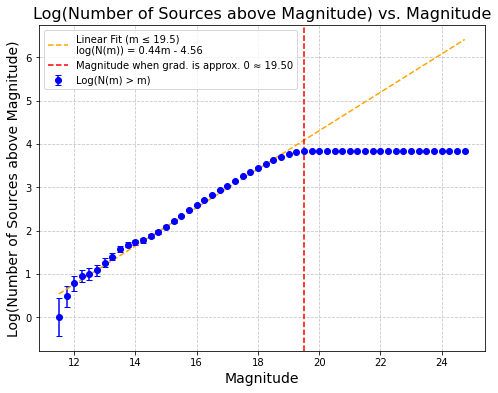

First magnitude threshold for horizontal line: 19.50
0.02
0.29


In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store results
thresholds = []
counts = []

# Loop through thresholds from 9.8 to 20 with a step of 0.25
for threshold in np.arange(0, 25, 0.25):
    count = len([value for value in data_mag if value <= threshold])
    thresholds.append(threshold)
    counts.append(count)

# Convert counts to log-scale and calculate Poisson errors
log_counts = []
errors_log_counts = []

for count in counts:
    if count > 0:
        log_count = np.log10(count)
        poisson_error = np.sqrt(count)  # Poisson error
        log_error = poisson_error / (count * np.log(10))  # Logarithmic error
    else:
        log_count = np.nan
        log_error = np.nan
    
    log_counts.append(log_count)
    errors_log_counts.append(log_error)

# Remove NaN values for fitting
valid_indices = ~np.isnan(log_counts)
valid_thresholds = np.array(thresholds)[valid_indices]
valid_log_counts = np.array(log_counts)[valid_indices]
valid_errors_log_counts = np.array(errors_log_counts)[valid_indices]

# Filter data up to m = 19.50 for the fit
fit_threshold = 19.50
fit_indices = valid_thresholds <= fit_threshold
fit_thresholds = valid_thresholds[fit_indices]
fit_log_counts = valid_log_counts[fit_indices]
fit_errors_log_counts = valid_errors_log_counts[fit_indices]

# Perform a linear fit on the filtered data
fit_coefficients = np.polyfit(fit_thresholds, fit_log_counts, 1)
fit_slope, fit_intercept = fit_coefficients
fit_line = np.polyval(fit_coefficients, valid_thresholds)  # Generate the fitted line for the entire x-axis range

# Initialize variables for sliding window slope analysis
window_size = 5  # Number of points in each sliding window
horizontal_slope_threshold = 0.01  # Threshold for horizontal line
first_horizontal_m = None

# Perform sliding window slope calculation
for i in range(len(valid_thresholds) - window_size + 1):
    window_thresholds = valid_thresholds[i:i + window_size]
    window_log_counts = valid_log_counts[i:i + window_size]
    coefficients = np.polyfit(window_thresholds, window_log_counts, 1)
    slope = coefficients[0]
    
    # Check if the slope is approximately zero
    if abs(slope) < horizontal_slope_threshold:
        first_horizontal_m = window_thresholds[0]
        break

# Plot the data with error bars and the fitted line
plt.figure(figsize=(8, 6))
plt.errorbar(valid_thresholds, valid_log_counts, yerr=valid_errors_log_counts, fmt='o', color='blue', label="Log(N(m) > m)", capsize=3)
plt.plot(valid_thresholds, fit_line, linestyle='--', color='orange', label=f"Linear Fit (m ≤ {fit_threshold})\nlog(N(m)) = {fit_slope:.2f}m - {-1*fit_intercept:.2f}")
plt.xlabel("Magnitude", fontsize=14)
plt.ylabel("Log(Number of Sources above Magnitude)", fontsize=14)
plt.title("Log(Number of Sources above Magnitude) vs. Magnitude", fontsize=16)
plt.grid(True, linestyle="--", alpha=0.7)

if first_horizontal_m is not None:
    plt.axvline(first_horizontal_m, color='red', linestyle='--', label=f"Magnitude when grad. is approx. 0 ≈ {first_horizontal_m:.2f}")
plt.legend()
plt.savefig('LOGN V M')
plt.show()

# Print the first m for horizontal line
if first_horizontal_m is not None:
    print(f"First magnitude threshold for horizontal line: {first_horizontal_m:.2f}")
else:
    print("No horizontal line detected within the thresholds.")
# Perform the original unweighted fit
coefficients = np.polyfit(valid_thresholds, valid_log_counts, 1)  # Original fit
slope, intercept = coefficients

# Calculate residuals
residuals = valid_log_counts - np.polyval(coefficients, valid_thresholds)

# Estimate the variance of the residuals
residual_variance = np.sum(residuals**2) / (len(valid_log_counts) - 2)

# Calculate the uncertainties in slope and intercept
delta = len(valid_log_counts) * np.sum(valid_thresholds**2) - (np.sum(valid_thresholds))**2
slope_uncertainty = np.sqrt(residual_variance * len(valid_log_counts) / delta)
intercept_uncertainty = np.sqrt(residual_variance * np.sum(valid_thresholds**2) / delta)

# Print the slope, intercept, and their uncertainties
print(f"{slope_uncertainty:.2f}")
print(f"{intercept_uncertainty:.2f}")
